In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Ajusted Datasets**

In [2]:
df_test = pd.read_csv('Dataset/test_ajusted.csv', index_col=0)
df_train = pd.read_csv('Dataset/train_ajusted.csv', index_col=0)
df_test_Satisfaction = pd.read_csv('Dataset/test_Satisfaction.csv', index_col=0)
df_train_Satisfaction = pd.read_csv('Dataset/train_Satisfaction.csv', index_col=0)

df_test = pd.DataFrame(df_test)
df_train = pd.DataFrame(df_train)
df_test_Satisfaction = pd.DataFrame(df_test_Satisfaction)
df_train_Satisfaction = pd.DataFrame(df_train_Satisfaction)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.076923,0.0,0.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.0,1.0,0.230769,1.0,1.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.0,0.0,0.243590,1.0,1.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.0,0.0,0.230769,1.0,1.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.0,0.0,0.692308,1.0,1.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


## **Creating Validation Data**

In [3]:
from sklearn.model_selection import train_test_split

X = df_train
Y = df_train_Satisfaction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **Training Model**

In [4]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Result = DT.predict(X_test)

## **Testing with Validation Data**

0.9455752851162119
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     11820
              satisfied       0.94      0.93      0.94      8961

               accuracy                           0.95     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.95      0.95      0.95     20781



Text(113.92222222222219, 0.5, 'Predicted')

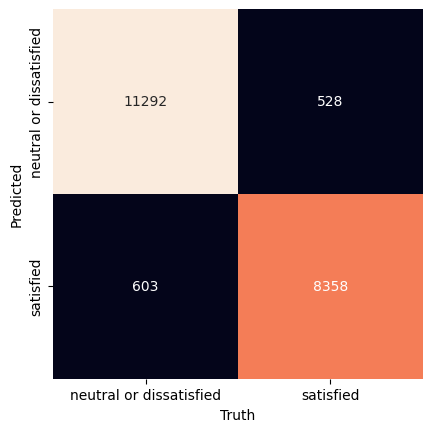

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

print(accuracy_score(Result, Y_test))
print(classification_report(Result, Y_test))

cm = confusion_matrix(Result, Y_test)
names = np.unique(Result)
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, xticklabels= names, yticklabels= names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

## **Testing Results**

0.720742223591007
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.68      0.79     20619
              satisfied       0.42      0.89      0.57      5357

               accuracy                           0.72     25976
              macro avg       0.69      0.78      0.68     25976
           weighted avg       0.85      0.72      0.75     25976



Text(113.92222222222219, 0.5, 'Predicted')

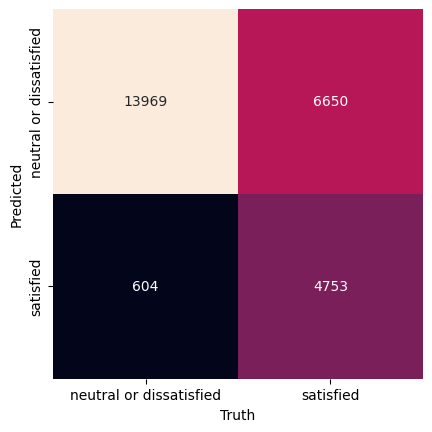

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

Result2 = DT.predict(df_test)
print(accuracy_score(Result2, df_test_Satisfaction))
print(classification_report(Result2, df_test_Satisfaction))

cm = confusion_matrix(Result2, df_test_Satisfaction)
names = np.unique(Result2)
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, xticklabels= names, yticklabels= names)
plt.xlabel('Truth')
plt.ylabel('Predicted')